# COVID19 DATA ANALYSIS

# Data Import

DATE: 2020-05-01


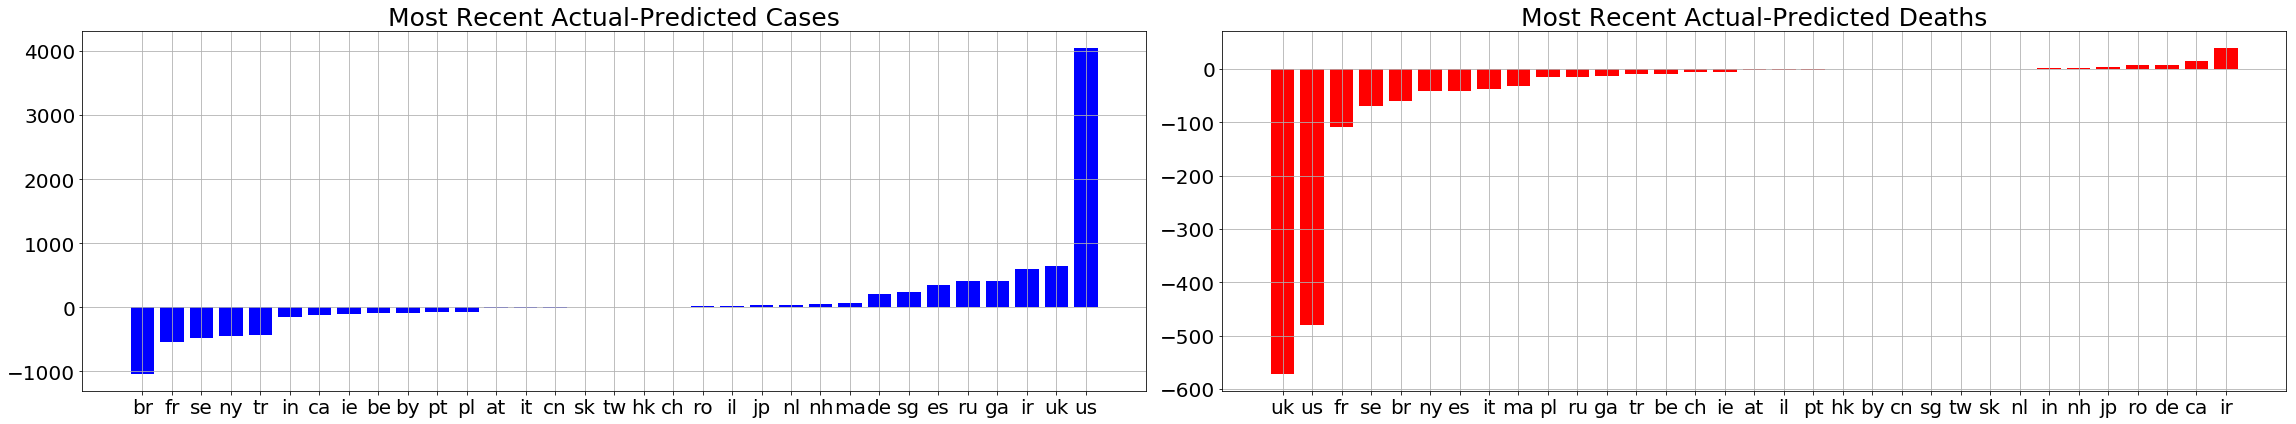

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
import cvlib as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#LOADING POPULATION DATA
country_data=pd.read_csv('countries.csv',index_col='country')

#LOADING DATA
data=pd.read_csv('covid19.csv')
data['date']=pd.to_datetime(data['date'])
N=len(data)

#COMPUTING RATES
K=3
r=0.5
countries=set()
for column in data.columns:
    if 'cases' in column:
        country=column.split('_')[1]
        countries.add(country)
        data['cases_rate_'+country]=cv.exp_rate(np.array(data['cases_'+country]))
        data['cases_rate_smooth_'+country]=cv.smooth(np.array(data['cases_rate_'+country]),K,r)
    elif 'deaths' in column:
        country=column.split('_')[1]
        countries.add(country)
        data['deaths_rate_'+country]=cv.exp_rate(np.array(data['deaths_'+country]))
        data['deaths_rate_smooth_'+country]=cv.smooth(np.array(data['deaths_rate_'+country]),K,r)

#CASES PREDICTION NEXT DAY AT CONSTANT RATE
cases_diff=pd.Series(index=countries)
print('DATE:',data.loc[N-1,'date'].date())
for country in countries:
    actual=data.loc[N-1,'cases_'+country]
    predicted=data.loc[N-2,'cases_'+country]*np.exp(data.loc[N-2,'cases_rate_smooth_'+country])
    difference=int(actual-predicted)
    cases_diff[country]=difference
cases_diff.sort_values(inplace=True)
    
#DEATHS PREDICTION NEXT DAY AT CONSTANT RATE
deaths_diff=pd.Series(index=countries)
for country in countries:
    actual=data.loc[N-1,'deaths_'+country]
    predicted=data.loc[N-2,'deaths_'+country]*np.exp(data.loc[N-2,'deaths_rate_smooth_'+country])
    difference=int(actual-predicted)
    deaths_diff[country]=difference
deaths_diff.sort_values(inplace=True)

#PLOTTING DIFFERENCES
fig,axes=plt.subplots(figsize=(32,6), nrows=1,ncols=2)
axes[0].set_title('Most Recent Actual-Predicted Cases',fontsize=25)
axes[0].tick_params(axis='both',labelsize=20)
axes[0].bar(cases_diff.index,height=cases_diff,tick_label=cases_diff.index,color='b')
axes[0].grid()
axes[1].set_title('Most Recent Actual-Predicted Deaths',fontsize=25)
axes[1].tick_params(axis='both',labelsize=20)
axes[1].bar(deaths_diff.index,height=deaths_diff,tick_label=deaths_diff.index,color='r')
axes[1].grid()
plt.tight_layout()

# Confirmed Cases

DATE: 2020-05-01


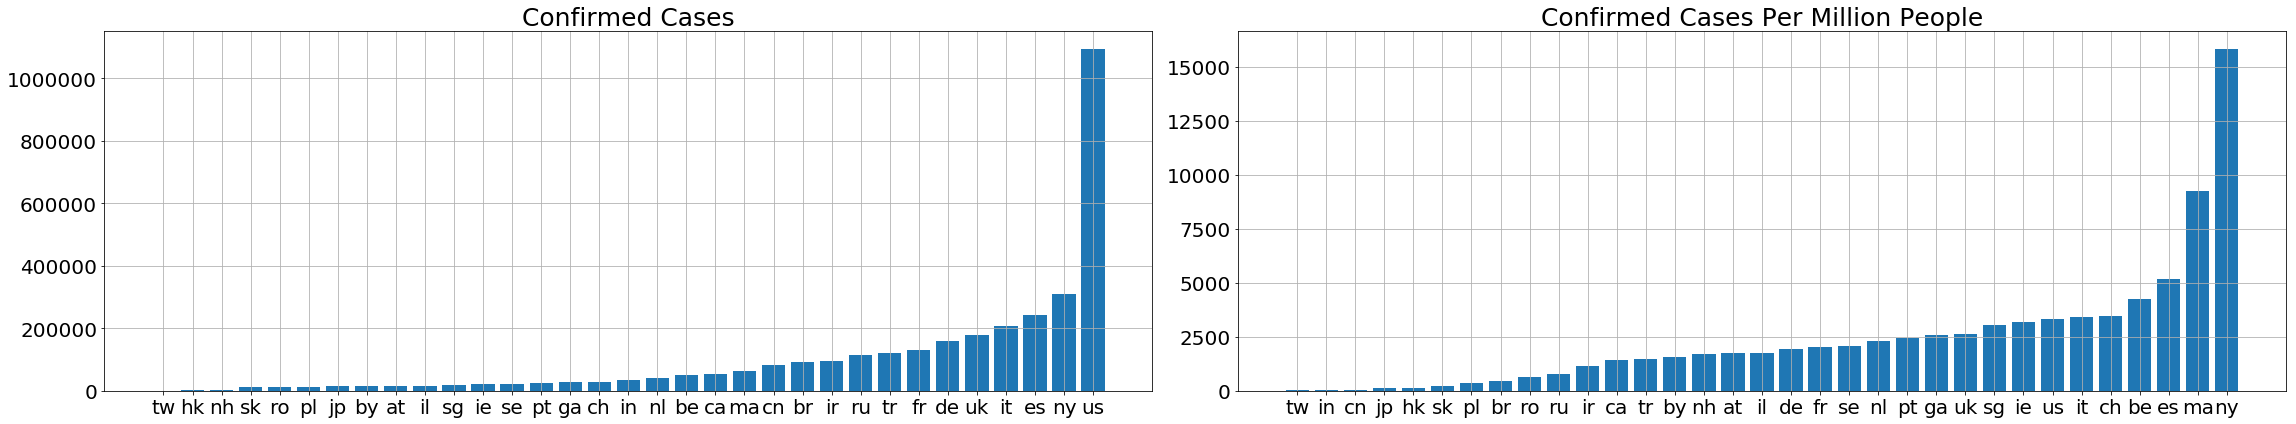

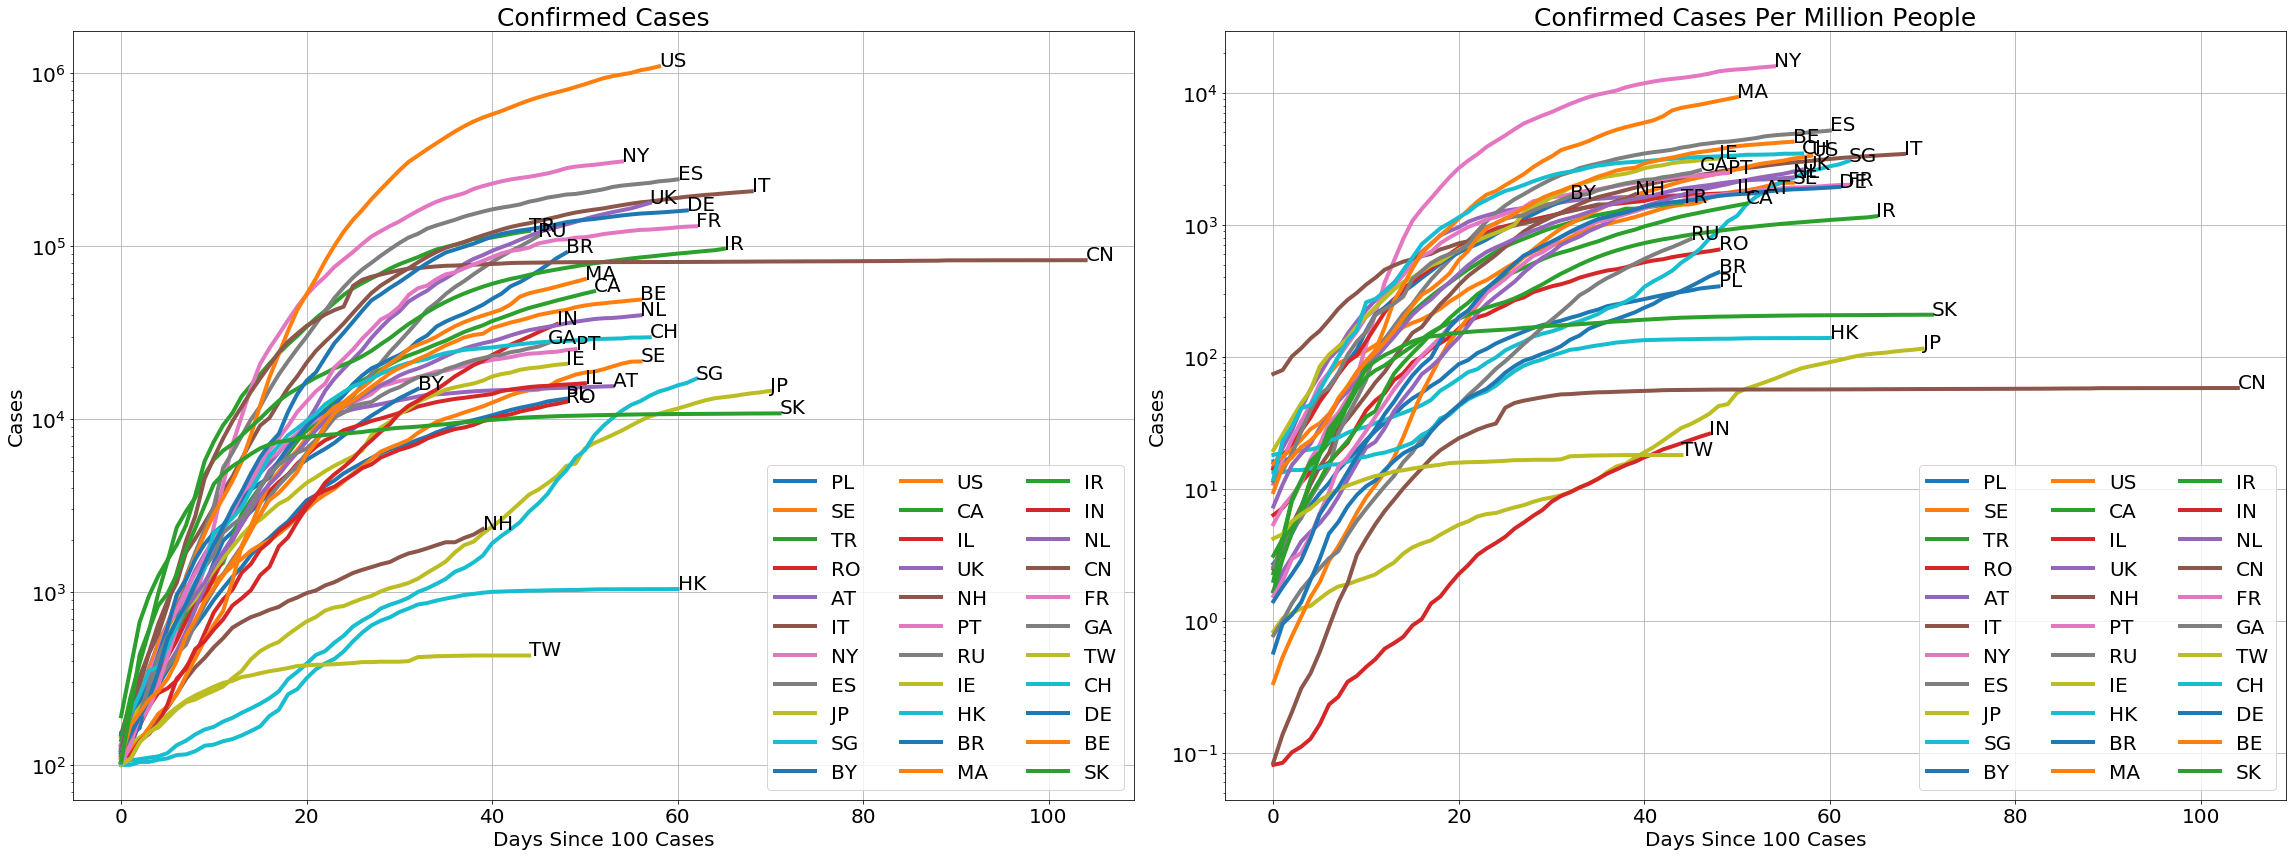

In [2]:
#COMPUTING CASES PER MILLION
confirmed=pd.DataFrame(index=countries,columns=['cases','cases_pm'])
for country in countries:
    confirmed.loc[country,'cases']=data.loc[N-1,'cases_'+country]
    confirmed.loc[country,'cases_pm']=data.loc[N-1,'cases_'+country]/(country_data.loc[country,'population']/1000000)

#PLOTTING
print('DATE:',data.loc[N-1,'date'].date())
fig,axes=plt.subplots(figsize=(32,6), nrows=1,ncols=2)
axes[0].set_title('Confirmed Cases',fontsize=25)
axes[0].tick_params(axis='both',labelsize=20)
axes[0].grid()
confirmed.sort_values(by='cases',inplace=True)
axes[0].bar(confirmed.index,height=confirmed['cases'],tick_label=confirmed.index)
axes[1].set_title('Confirmed Cases Per Million People',fontsize=25)
axes[1].tick_params(axis='both',labelsize=20)
confirmed.sort_values(by='cases_pm',inplace=True)
axes[1].bar(confirmed.index,height=confirmed['cases_pm'],tick_label=confirmed.index)
axes[1].grid()
plt.tight_layout()

#CONFIRMED CASES
mincases=100
fig2,axes2=plt.subplots(figsize=(32,12), nrows=1,ncols=2)

for country in countries:
    curve=np.array(data['cases_'+country][data['cases_'+country]>=mincases])
    curve_pm=np.array(data['cases_'+country][data['cases_'+country]>=mincases])/(country_data.loc[country,'population']/1000000)
    axes2[0].plot(curve,linewidth=4, label=country.upper())
    axes2[0].text(len(curve)-1,curve[-1],country.upper(),fontsize=20)
    axes2[1].plot(curve_pm,linewidth=4, label=country.upper())
    axes2[1].text(len(curve_pm)-1,curve_pm[-1],country.upper(),fontsize=20)
    
axes2[0].set_title('Confirmed Cases',fontsize=25)
axes2[0].tick_params(axis='both',labelsize=20)
axes2[0].set_xlabel('Days Since '+str(mincases)+' Cases',fontsize=20)
axes2[0].set_ylabel('Cases',fontsize=20)
axes2[0].set_yscale('log')
axes2[0].legend(loc='best',fontsize=20,ncol=3)
axes2[0].grid()
axes2[1].set_title('Confirmed Cases Per Million People',fontsize=25)
axes2[1].tick_params(axis='both',labelsize=20)
axes2[1].set_xlabel('Days Since '+str(mincases)+' Cases',fontsize=20)
axes2[1].set_ylabel('Cases',fontsize=20)
axes2[1].set_yscale('log')
axes2[1].legend(loc='best',fontsize=20,ncol=3)
axes2[1].grid()
plt.tight_layout()

# Confirmed Cases Growth Rate

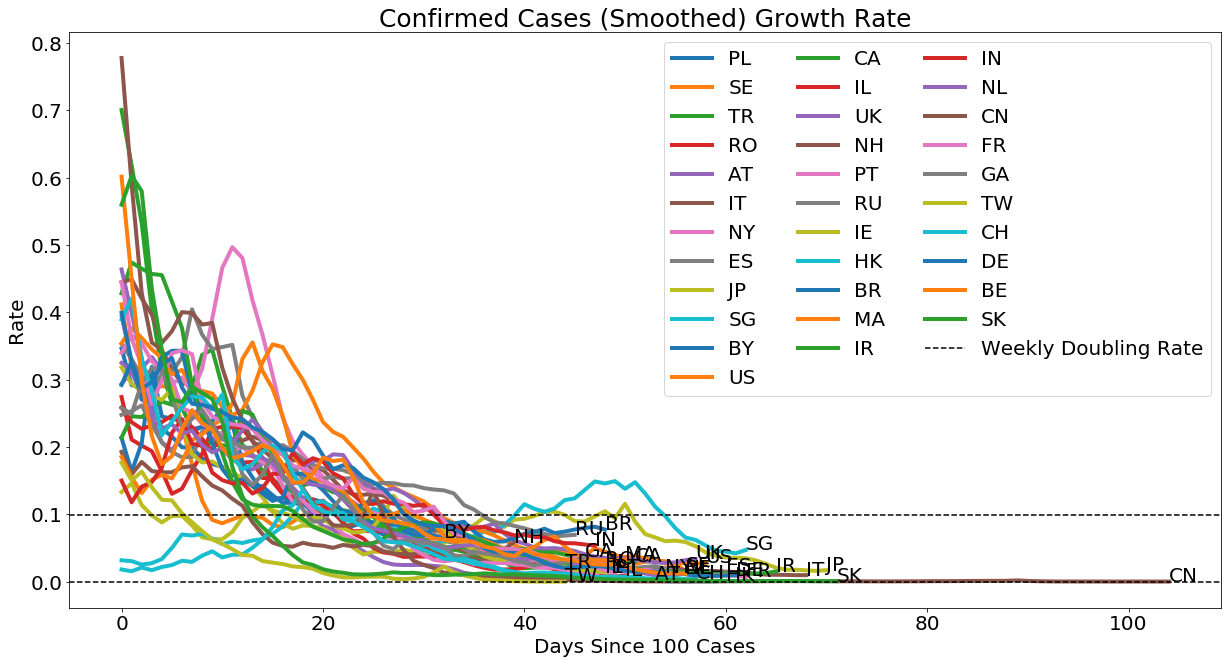

In [3]:
#CONFIRMED CASES GROWTH RATE
mincases=100
fig=plt.figure(figsize=(16,8))
ax=fig.add_axes([0,0,1,1])

for country in countries:
    curve=np.array(data['cases_rate_smooth_'+country][data['cases_'+country]>=mincases])
    ax.plot(curve,linewidth=4, label=country.upper())
    ax.text(len(curve)-1,curve[-1],country.upper(),fontsize=20)

ax.axhline(y=np.log(2.0)/7.0, linestyle='--', color='k', label='Weekly Doubling Rate')
ax.axhline(y=0.0, linestyle='--', color='k')
ax.set_title('Confirmed Cases (Smoothed) Growth Rate',fontsize=25)
ax.tick_params(axis='both',labelsize=20)
ax.set_xlabel('Days Since '+str(mincases)+' Cases',fontsize=20)
ax.set_ylabel('Rate',fontsize=20)
ax.legend(loc='best',fontsize=20,ncol=3)

# Deaths

/home/kyle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


DATE: 2020-05-01


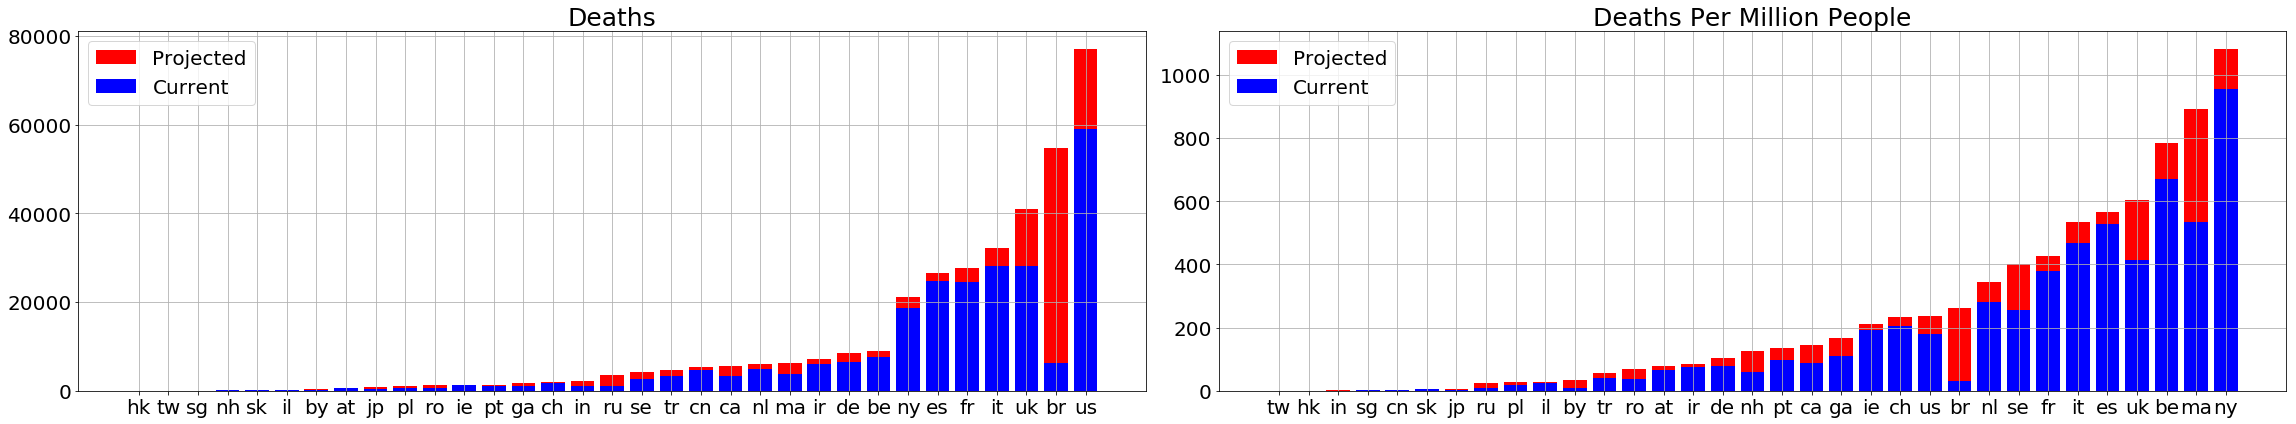

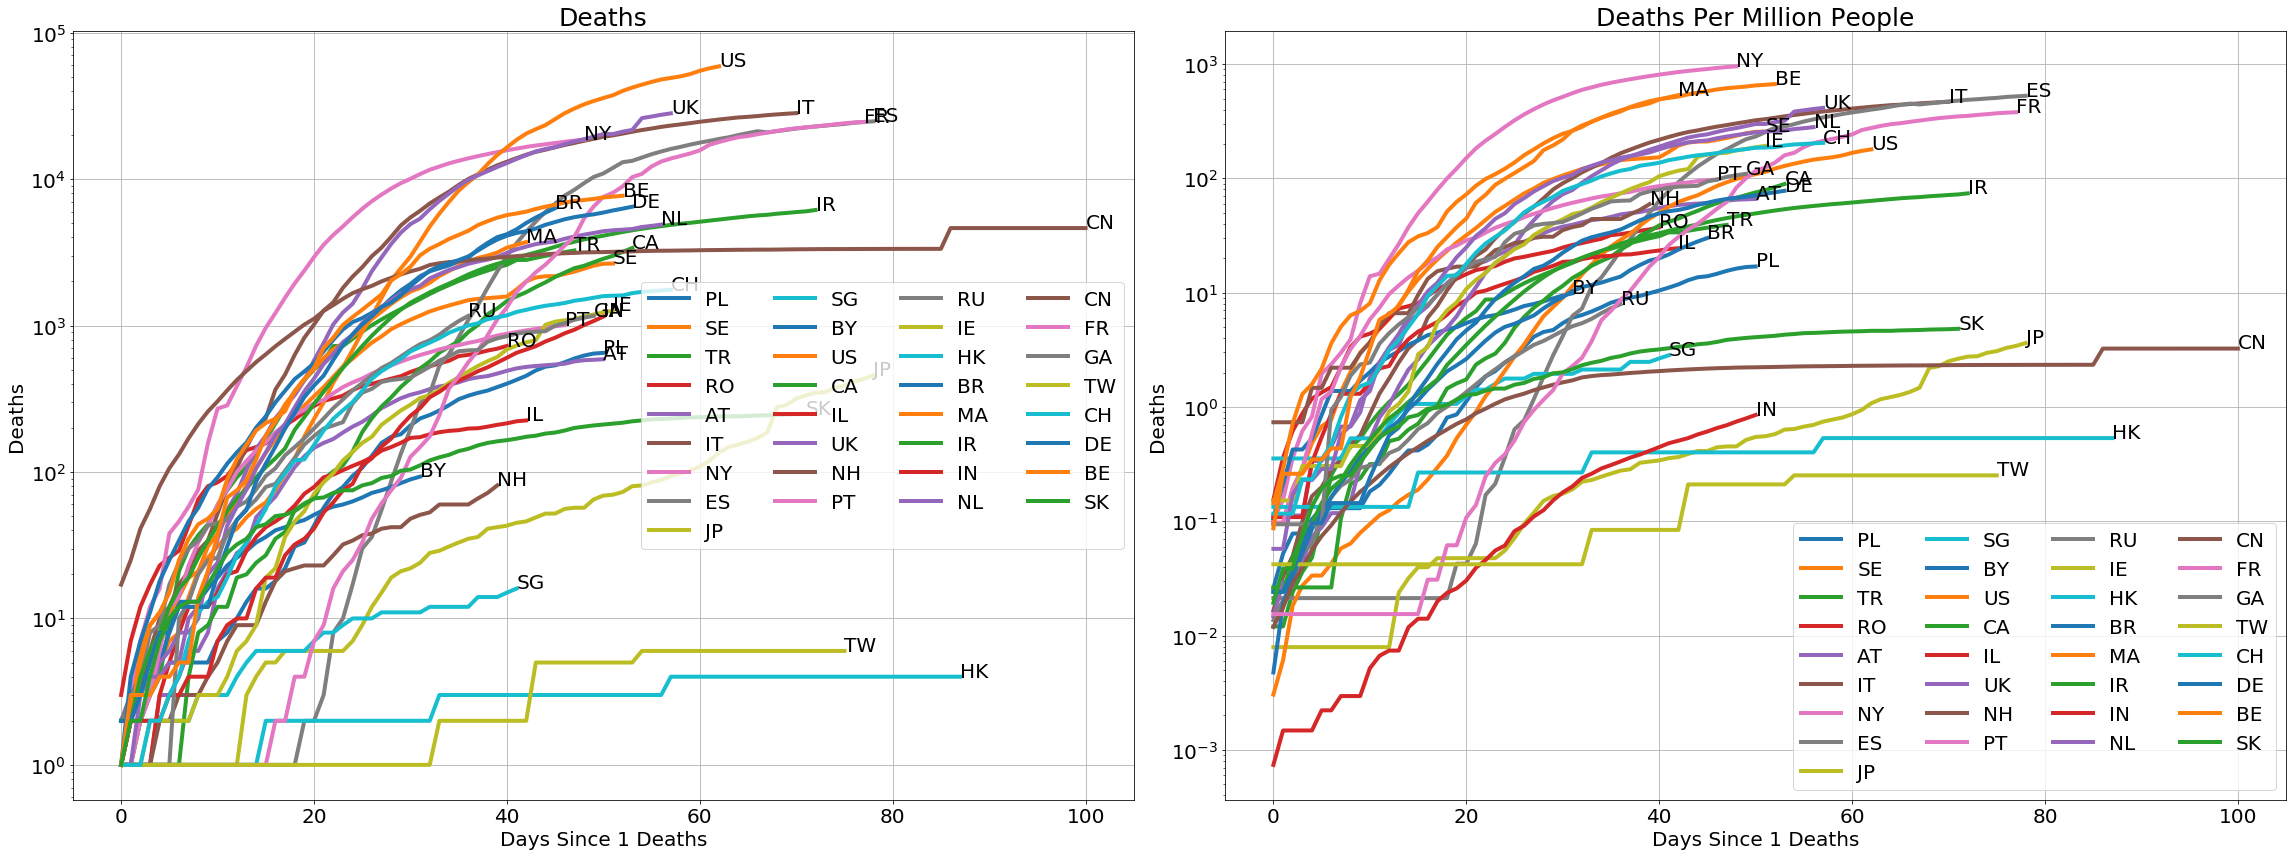

In [10]:
#COMPUTING DEATHS PER MILLION
dead=pd.DataFrame(index=countries,columns=['deaths','projected_deaths','deaths_pm','projected_deaths_pm'])
for country in countries:
    dead.loc[country,'deaths']=data.loc[N-1,'deaths_'+country]
    dead.loc[country,'deaths_pm']=data.loc[N-1,'deaths_'+country]/(country_data.loc[country,'population']/1000000)

#COMPUTING PROJECTION
from scipy.optimize import curve_fit
for country in countries:
    if country not in ['jp']:
        y=np.array(data['deaths_'+country][data['deaths_'+country]>0])
        x=np.arange(len(y))

        def f1(t,B,A,r,t1):
                return B+A/(1+np.exp(-r*(t-t1)))
        p1=curve_fit(f1,x,y,p0=[np.min(y),np.max(y),0.1,len(y)/2],maxfev=10000)[0]

        def f2(t,B,A,r1,r2,t1):
            return B+A/(1+np.exp(-(r2+(r1/(1+np.exp(r2*(t-t1)))))*(t-t1)))
        p2=curve_fit(f2,x,y,p0=[p1[0],p1[1],p1[2],p1[2],p1[3]])[0]

        projection=p2[0]+p2[1]
        dead.loc[country,'projected_deaths']=projection
        dead.loc[country,'projected_deaths_pm']=projection/(country_data.loc[country,'population']/1000000)
    else:
        projection=2*dead.loc[country,'deaths']
        dead.loc[country,'projected_deaths']=projection
        dead.loc[country,'projected_deaths_pm']=projection/(country_data.loc[country,'population']/1000000)
        
    
#PLOTTING
print('DATE:',data.loc[N-1,'date'].date())
fig,axes=plt.subplots(figsize=(32,6), nrows=1,ncols=2)
axes[0].set_title('Deaths',fontsize=25)
axes[0].tick_params(axis='both',labelsize=20)
dead.sort_values(by='projected_deaths',inplace=True)
axes[0].bar(dead.index,height=dead['projected_deaths'],tick_label=dead.index,color='r',label='Projected')
axes[0].bar(dead.index,height=dead['deaths'],tick_label=dead.index,color='b',label='Current')
axes[0].legend(loc='best',fontsize=20)
axes[0].grid()
axes[1].set_title('Deaths Per Million People',fontsize=25)
axes[1].tick_params(axis='both',labelsize=20)
dead.sort_values(by='projected_deaths_pm',inplace=True)
axes[1].bar(dead.index,height=dead['projected_deaths_pm'],tick_label=dead.index,color='r',label='Projected')
axes[1].bar(dead.index,height=dead['deaths_pm'],tick_label=dead.index,color='b',label='Current')
axes[1].legend(loc='best',fontsize=20)
axes[1].grid()
plt.tight_layout()

#CONFIRMED DEATHS
mindeaths=1
fig2,axes2=plt.subplots(figsize=(32,12), nrows=1,ncols=2)

for country in countries:
    curve=np.array(data['deaths_'+country][data['deaths_'+country]>=mindeaths])
    curve_pm=np.array(data['deaths_'+country][data['deaths_'+country]>=mindeaths])/(country_data.loc[country,'population']/1000000)
    axes2[0].plot(curve,linewidth=4, label=country.upper())
    axes2[0].text(len(curve)-1,curve[-1],country.upper(),fontsize=20)
    axes2[1].plot(curve_pm,linewidth=4, label=country.upper())
    axes2[1].text(len(curve_pm)-1,curve_pm[-1],country.upper(),fontsize=20)
    
axes2[0].set_title('Deaths',fontsize=25)
axes2[0].tick_params(axis='both',labelsize=20)
axes2[0].set_xlabel('Days Since '+str(mindeaths)+' Deaths',fontsize=20)
axes2[0].set_ylabel('Deaths',fontsize=20)
axes2[0].set_yscale('log')
axes2[0].legend(loc='best',fontsize=20,ncol=4)
axes2[0].grid()
axes2[1].set_title('Deaths Per Million People',fontsize=25)
axes2[1].tick_params(axis='both',labelsize=20)
axes2[1].set_xlabel('Days Since '+str(mindeaths)+' Deaths',fontsize=20)
axes2[1].set_ylabel('Deaths',fontsize=20)
axes2[1].set_yscale('log')
axes2[1].legend(loc='best',fontsize=20,ncol=4)
axes2[1].grid()
plt.tight_layout()

# Grouping Countries By Severity

In [5]:
#RETYPING DEAD DATAFRAME
dead['deaths']=dead['deaths'].astype('float')
dead['deaths_pm']=dead['deaths_pm'].astype('float')
dead['projected_deaths']=dead['projected_deaths'].astype('float')
dead['projected_deaths_pm']=dead['projected_deaths_pm'].astype('float')

#COMPUTING COUNTRY CLUSTERS
from sklearn.cluster import KMeans
four_cluster=KMeans(n_clusters=6, random_state=0)
clusters=four_cluster.fit_predict(np.array(dead['projected_deaths_pm']).reshape(-1,1))
dead['cluster']=clusters

#SORTING CLUSTERS
clusters_sorted=dead.groupby('cluster').mean()['projected_deaths_pm'].sort_values().index
dead['cluster']=dead['cluster'].apply(lambda x:clusters_sorted.get_loc(x))

#DISPLAYING RESULTS
print('DATE:',data.loc[N-1,'date'].date())
for i in dead['cluster'].unique():
    print('\nPANDEMIC LEVEL:',i)
    print(list(dead['cluster'][dead['cluster']==i].index))

#RESULTS
dead.sort_values(by='projected_deaths_pm',ascending=False)

DATE: 2020-05-01

PANDEMIC LEVEL: 0
['tw', 'hk', 'in', 'sg', 'cn', 'sk', 'jp', 'ru', 'pl', 'il', 'by', 'tr', 'ro', 'at', 'ir', 'de']

PANDEMIC LEVEL: 1
['nh', 'pt', 'ca', 'ga', 'ie', 'ch', 'us', 'br']

PANDEMIC LEVEL: 2
['nl', 'se', 'fr']

PANDEMIC LEVEL: 3
['it', 'es', 'uk']

PANDEMIC LEVEL: 4
['be', 'ma']

PANDEMIC LEVEL: 5
['ny']


,deaths,projected_deaths,deaths_pm,projected_deaths_pm,cluster
ny,18610.0,21078.938351,956.637194,1083.551662,5
ma,3716.0,6190.001049,535.495066,892.011576,4
be,7703.0,9035.156948,668.907473,784.588343,4
uk,28131.0,41085.404163,414.385858,605.211704,3
es,24824.0,26559.295762,528.087438,565.002838,3
it,28236.0,32167.737368,468.125830,533.310269,3
fr,24594.0,27613.172113,379.338002,425.905730,2
se,2653.0,4154.139930,256.738888,402.008769,2
nl,4893.0,6004.856345,280.803798,344.611990,2
br,6329.0,54855.855901,30.116995,261.035481,1


# Deaths Growth Rate

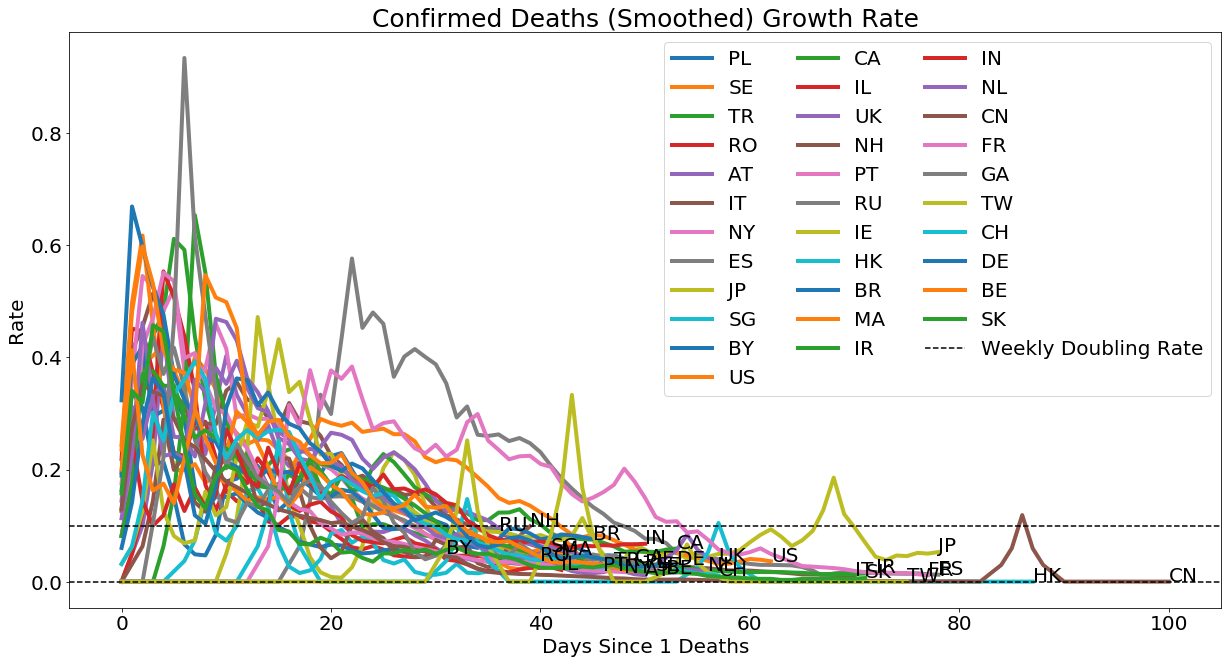

In [6]:
#CONFIRMED DEATHS GROWTH RATE
mindeaths=1
fig=plt.figure(figsize=(16,8))
ax=fig.add_axes([0,0,1,1])

for country in countries:
    curve=np.array(data['deaths_rate_smooth_'+country][data['deaths_'+country]>=mindeaths])
    ax.plot(curve,linewidth=4, label=country.upper())
    ax.text(len(curve)-1,curve[-1],country.upper(),fontsize=20)

ax.axhline(y=np.log(2.0)/7.0, linestyle='--', color='k', label='Weekly Doubling Rate')
ax.axhline(y=0.0, linestyle='--', color='k')
ax.set_title('Confirmed Deaths (Smoothed) Growth Rate',fontsize=25)
ax.tick_params(axis='both',labelsize=20)
ax.set_xlabel('Days Since '+str(mindeaths)+' Deaths',fontsize=20)
ax.set_ylabel('Rate',fontsize=20)
ax.legend(loc='best',fontsize=20,ncol=3)

## Analyzing Influenza Data

In [7]:
flu=pd.read_csv('influenza.csv')
flu=flu[['SEASON','WEEK RN','NUM INFLUENZA DEATHS']]

flu['SEASON']=flu['SEASON'].apply(lambda x:x[0:4]).astype('int')
flu=flu.sort_values(by=['SEASON','WEEK RN'])
flu.reset_index(drop=True,inplace=True)
flu=flu.rename(columns={'SEASON':'season','WEEK RN':'week_rn','NUM INFLUENZA DEATHS':'deaths'})

N_flu=len(flu)
L=12

flu['deaths_'+str(L)]=np.empty(N_flu)
for k in range(N_flu):
    if k<L-1:
        flu.loc[k,'deaths_'+str(L)]=None
    else:
        flu.loc[k,'deaths_'+str(L)]=flu.loc[k-(L-1):k,'deaths'].sum()

flu['deaths_'+str(L)].max()

12809.0